# Application of supervised learning

## Dataset presentation

**Short Description** : The chosen dataset contains Spotify tracks as the samples. For each sample we have the audio features as well as the artist, album and track name. Each track is also labeled with a genre, which allows us to explore how well musical features can predict the stylistic category of a song. These features are automatically produced by Spotify’s audio analysis tools and allow for a data-driven view of music beyond tags or listener opinions.

**Link** : https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

**Features Presentation** : Reffering to the HuggingFace card of the dataset, here is the list of features :

**[ track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre ]**

And a description of the features that may be not trivial:

- **popularity** : The popularity of a track is a value between 0 and 100 computed by an algorithm, with 100 being the most popular.

- **danceability** : Danceability is a float between 0.0 and 1.0 that describes how suitable a track is for dancing based on a combination of musical elements.

- **energy** : Energy is a float between 0.0 and 1.0 and represents tracks that feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- **loudness** : The overall loudness of a track in decibels (dB).

- **mode** : Major is represented by 1 and minor is 0.

- **speechiness** : Speechiness is a float between 0.0 and 1.0 and represents the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words.

- **acousticness** : Acousticness is a float between 0.0 and 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **instrumentalness** : Instrumentalness is a float between 0.0 and 1.0 and represents whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

- **liveness** : Liveness is a float between 0.0 and 1.0 and represents the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- **valence** : Liveness is a float between 0.0 and 1.0 and represents the musical positiveness of a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo** : The overall estimated tempo (speed of pace) of a track in beats per minute (BPM).

- **time_signature** : An estimated time signature. The time signature is a music convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

# Problem to solve

We want to predict the genre of a music track based on its audio features. This is a classification problem, where the target variable is the track’s genre, and the input features are the various audio features.

**Why this problem?**

Solving this problem could have a value in industry for:

- Recommendation systems.

- Music discovery platforms can benefit by organizing tracks into better genre-specific playlists.

- Independent artists who may not have explicit genre tags can have their music correctly placed in the right category using algorithmic prediction.

- Search and filtering functionalities can become more robust when genres are predicted based on actual sound properties instead of relying only on metadata.

By training a classification model on this dataset, we aim to test how well a machine learning model can recognize musical styles purely based on how the tracks sound, independently of artist names or song titles.

# Dataset Analysis

In [31]:
from datasets import load_dataset

ds = load_dataset("maharshipandya/spotify-tracks-dataset")['train']
ds

Dataset({
    features: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'],
    num_rows: 114000
})

In [32]:
df = ds.to_pandas()
df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates()
df = df.dropna()
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [33]:
df[df['track_genre'] == 'techno']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.093300,0.000927,0.1150,0.1660,100.966,4,techno
109001,0b6wdul3A5sQNpIOv03OxP,Duke Dumont,Ocean Drive,Ocean Drive,72,206320,False,0.686,0.718,8,-5.054,0,0.0431,0.006370,0.000703,0.1190,0.5570,115.026,4,techno
109002,0zoGVO4bQXG8U6ChKwNgeg,Taeko Onuki,MIGNONNE (Mastered by Bernie Grundman),4:00A.M.,70,336960,False,0.631,0.644,10,-10.810,0,0.0348,0.341000,0.000411,0.0877,0.8610,103.376,4,techno
109003,6uBhi9gBXWjanegOb2Phh0,Zedd;Alessia Cara,Stay,Stay,76,210090,False,0.690,0.622,5,-5.025,0,0.0622,0.253000,0.000000,0.1160,0.5440,102.040,4,techno
109004,5aUSEPNd3m5xliFK4pn5mU,Zedd;Kehlani,Good Thing (with Kehlani),Good Thing (with Kehlani),68,210901,True,0.693,0.564,1,-3.857,0,0.0378,0.399000,0.000000,0.0409,0.5740,185.913,3,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1910z5NqrGoJ8SuKWNu19D,Scooter,I Want You to Stream!,Bora Bora Bora - Live,25,230250,False,0.726,0.875,9,-5.957,0,0.1930,0.203000,0.001510,0.5680,0.5230,139.955,4,techno
109996,2MgcPgxFvAlJCVITsEghCI,Ruffneck;Yavahn;Sharam Jey;Kolombo,Everybody Be Somebody: All The Classics And...,"Everybody Be Somebody - Sharam Jey, Kolombo Remix",24,252524,False,0.875,0.511,6,-6.677,0,0.0474,0.204000,0.044500,0.1390,0.5870,122.169,4,techno
109997,3Rn21K5Te3TUM0AcFtisuX,Marshall Masters,Thunderdome Die Hard II (Digital Version),Return To Zero - The Mystery Land Anthem,25,120110,False,0.679,0.866,8,-9.691,1,0.0719,0.000038,0.755000,0.9560,0.0457,147.086,4,techno
109998,3P5xhGZ3c9tOmyvpiTAvVn,Paul Elstak,b2s Presents Paul Elstak,The Dj’s Pumping - Freestyle Edit,24,179175,False,0.602,0.933,10,-4.886,1,0.0471,0.001720,0.032500,0.3720,0.5190,150.047,4,techno


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le2 = LabelEncoder()

numeric_df = df.select_dtypes(include=['number'])

numeric_df = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name'])
numeric_df['track_genre'] = le.fit_transform(df['track_genre'])
numeric_df['explicit'] = le2.fit_transform(df['explicit'])
numeric_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


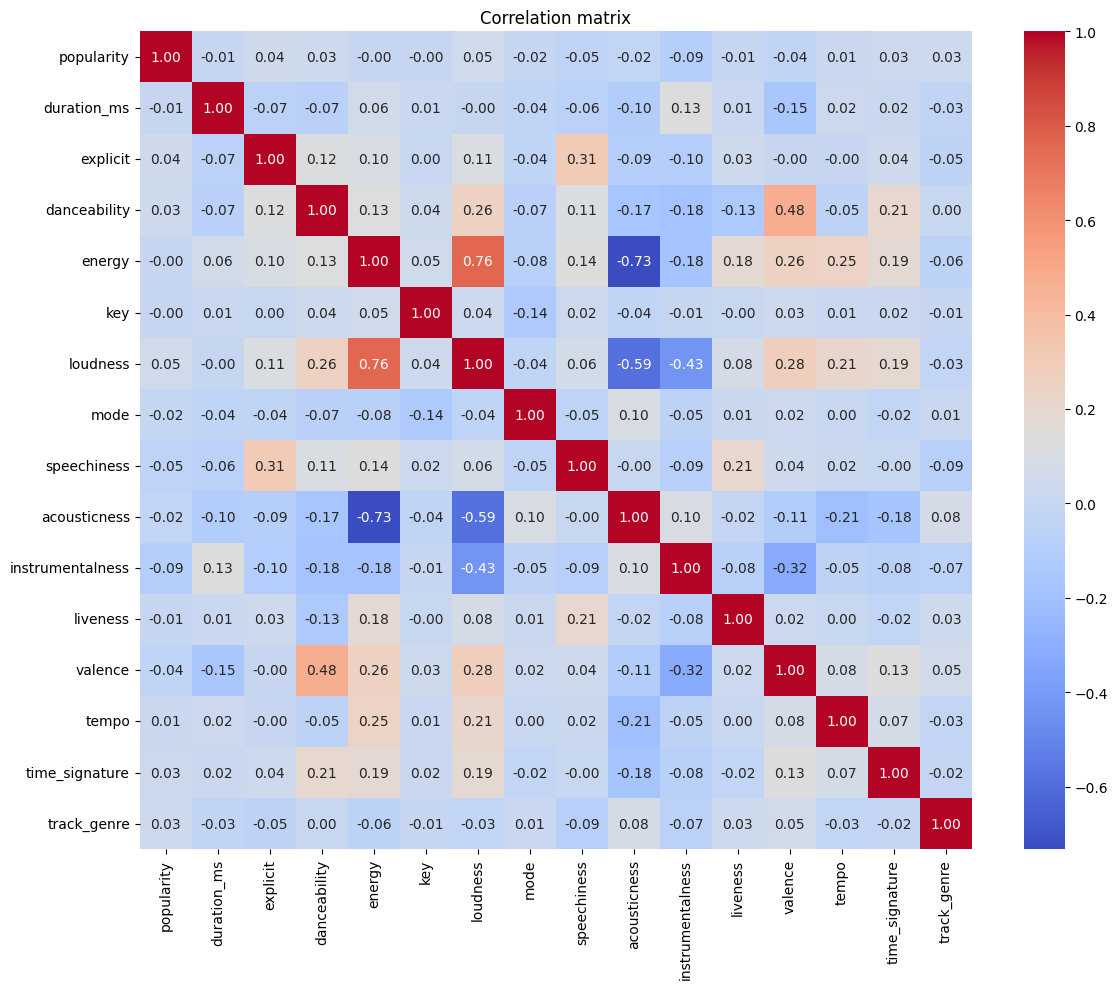

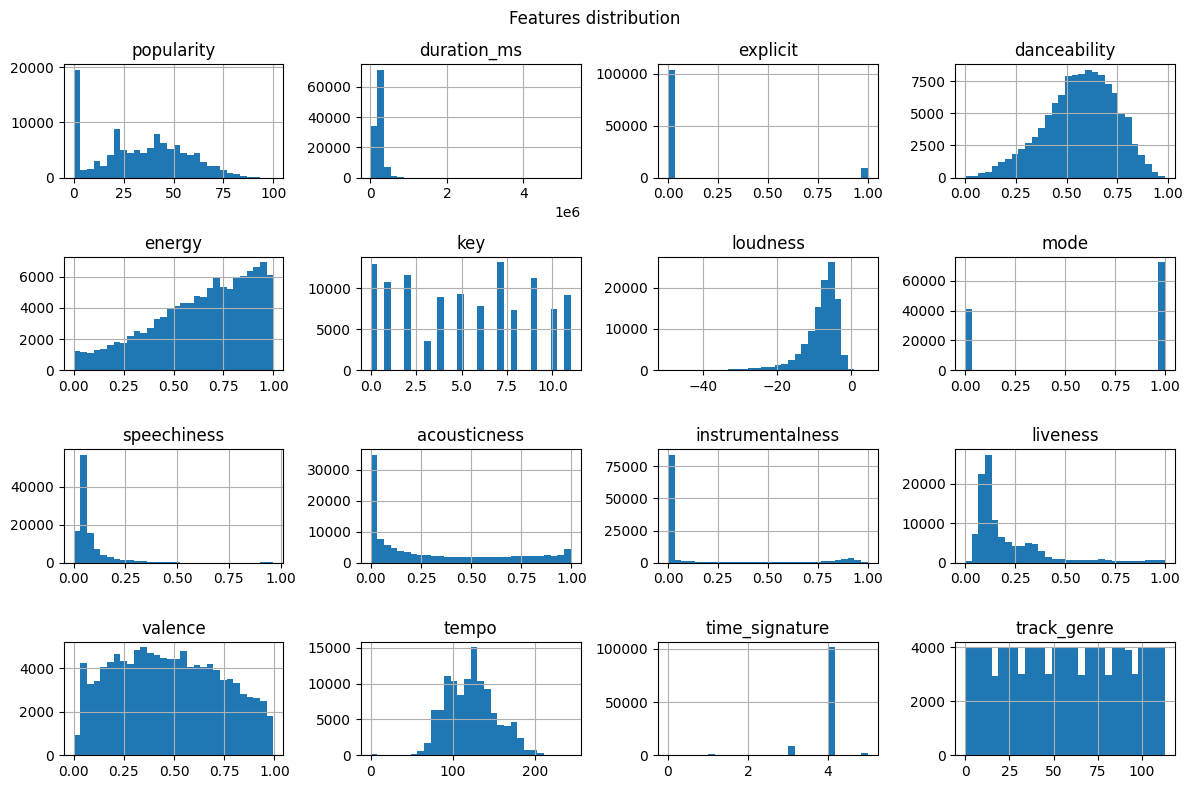

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

cols = numeric_df.columns
numeric_df[cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Features distribution")
plt.tight_layout()
plt.show()

**Popularity**

The distribution is biased toward lower values, suggesting that the dataset contains many less known or rarely played tracks.
There is no strong correlation between popularity and any other variable. This suggests that popularity is largely independent of audio features.

**Loudness, Energy, Acousticness, and Instrumentalness**

Loudness is strongly correlated with:

- Energy (0.76): energetic tracks tend to be louder.

- Acousticness (-0.59) and Instrumentalness (-0.43): those tracks are typically softer.

Loud tracks are generally energetic, not acoustic, and rarely instrumental. The later is interesting since there is a lot of eletronic songs, this is a dataset bias that we explain later.

**Danceability**

Danceability is positively correlated with:

- Valence (0.48): happy songs tend to be more danceable.

- Loudness (0.26) and Energy (0.26): danceable music is usually louder and more energetic.

Danceable songs tend to be happy, energetic, and loud.

**Speechiness**

Speechiness is correlated with:

- Explicit (0.31): tracks with more spoken content are more likely to contain explicit lyrics.

- Liveness (0.21): live recordings may include spoken segments or interactions with the audience.

Speechy tracks are more likely to be explicit and performed live.


**Mode and Key**

Both show very low or no correlation with other features.

Mode is weakly correlated with Acousticness (0.10), this might be caused by minor keys. It is interesting that there is no correlation with the Valence.
Key appears to have no meaningful relationship with other features.

These features might be useless.

**Tempo**

Tempo correlates with Energy (0.25) and Valence (0.13)

Faster tracks tend to be more energetic and a bit positive.

Also, Tempo values equal to zero likely represent invalid or missing data and should be removed.

**Time Signature**

This feature shows very low variance, with a strong dominance of 4/4 time and very few instances of 3/4.

All values are in x/4 format meaning there is no representation of compound meters such as 6/8 or 9/8.

This feature might be useless.

**Track Genre**

The genre distribution appears relatively balanced across classes.
There are no strong correlations between genre and other features, which is expected for a well balanced classification task.
It suggests that genres in the dataset are not trivially predictable and reflects realistic musical complexity.

In [48]:
numeric_df = numeric_df[numeric_df['tempo'] != 0]

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings("ignore")

X = numeric_df.copy()
y = numeric_df['track_genre']
numeric_df
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)
print("Logistic Regression")
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy :  {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall :    {rec:.3f}")
print(f"F1-score :  {f1:.3f}")

Logistic Regression
Accuracy :  0.495
Precision : 0.478
Recall :    0.495
F1-score :  0.478


In [51]:
from sklearn.svm import SVC

svc = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced', 
    random_state=42
)
svc.fit(X_train_s, y_train)
y_pred = svc.predict(X_test_s)
print("SVM")
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy :  {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall :    {rec:.3f}")
print(f"F1-score :  {f1:.3f}")


SVM
Accuracy :  0.596
Precision : 0.589
Recall :    0.596
F1-score :  0.585


In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=None,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy :  {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall :    {rec:.3f}")
print(f"F1-score :  {f1:.3f}")

Decision Tree
Accuracy :  0.818
Precision : 0.798
Recall :    0.818
F1-score :  0.801


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest")
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec  = recall_score(y_test, y_pred, average='weighted')
f1   = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy :  {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall :    {rec:.3f}")
print(f"F1-score :  {f1:.3f}")

Random Forest
Accuracy :  0.892
Precision : 0.893
Recall :    0.892
F1-score :  0.892


The correlation matrix reveals notable multicollinearity among features, which may explain why random forests outperform the other models sincce they are good at capturing non-linear patterns and complex interactions.

Now we want to check if the features : `time_signature`, `mode`, `key` and `popularity` were really unrelevant.

In [ ]:
columns = ['', 'time_signature', 'mode', 'key', 'popularity']

for col in columns:

    filtered_df = numeric_df if col=='' else numeric_df.drop(columns=[col])

    X = filtered_df.copy()
    y = filtered_df['track_genre']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
    )

    rf = RandomForestClassifier(random_state=42)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print("Random Forest")
    print('Dropping only column: ' + col)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec  = recall_score(y_test, y_pred, average='weighted')
    f1   = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy :  {acc:.3f}")
    print(f"Precision : {prec:.3f}")
    print(f"Recall :    {rec:.3f}")
    print(f"F1-score :  {f1:.3f}")

Random Forest
Dropping only column: 
Accuracy :  0.892
Precision : 0.893
Recall :    0.892
F1-score :  0.892
Random Forest
Dropping only column: time_signature
Accuracy :  0.830
Precision : 0.831
Recall :    0.830
F1-score :  0.829
Random Forest
Dropping only column: mode
Accuracy :  0.832
Precision : 0.833
Recall :    0.832
F1-score :  0.831
Random Forest
Dropping only column: key
Accuracy :  0.825
Precision : 0.826
Recall :    0.825
F1-score :  0.825
Random Forest
Dropping only column: popularity
Accuracy :  0.786
Precision : 0.787
Recall :    0.786
F1-score :  0.785


Finaly, here we can deduce that those features encode real relationship that are usefull for our model and we will keep them in our dataset. The RandomForest algorithme seems to be really useful to find the complex relations in our data.

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = numeric_df.copy()
y = numeric_df['track_genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def objective(trial):
    params = {
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt','log2'])
    }
    model = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted') #5-fold
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

print("Optuna best_params:", study.best_params)
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)
y_pred_opt = best_rf_optuna.predict(X_test)

print("\nFinal RandomForest")
print(f"Accuracy :  {accuracy_score(y_test, y_pred_opt):.3f}")
print(f"Precision : {precision_score(y_test, y_pred_opt, average='weighted'):.3f}")
print(f"Recall :    {recall_score(y_test, y_pred_opt, average='weighted'):.3f}")
print(f"F1-score :  {f1_score(y_test, y_pred_opt, average='weighted'):.3f}")

[I 2025-07-09 10:25:27,880] A new study created in memory with name: no-name-d9035fec-5ed4-4439-9093-91e2cab14b5f
[I 2025-07-09 10:27:14,617] Trial 0 finished with value: 0.8950207867797128 and parameters: {'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.8950207867797128.
[I 2025-07-09 10:28:48,402] Trial 1 finished with value: 0.8741426952428542 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8950207867797128.
[I 2025-07-09 10:30:31,978] Trial 2 finished with value: 0.8957054097154152 and parameters: {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.8957054097154152.
[I 2025-07-09 10:32:12,680] Trial 3 finished with value: 0.8829361052644961 and parameters: {'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.8957054097154152.
[I 2025-07-09 10:33:53,395] Tria

Optuna best_params: {'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}

Final RandomForest
Accuracy :  0.904
Precision : 0.905
Recall :    0.904
F1-score :  0.903


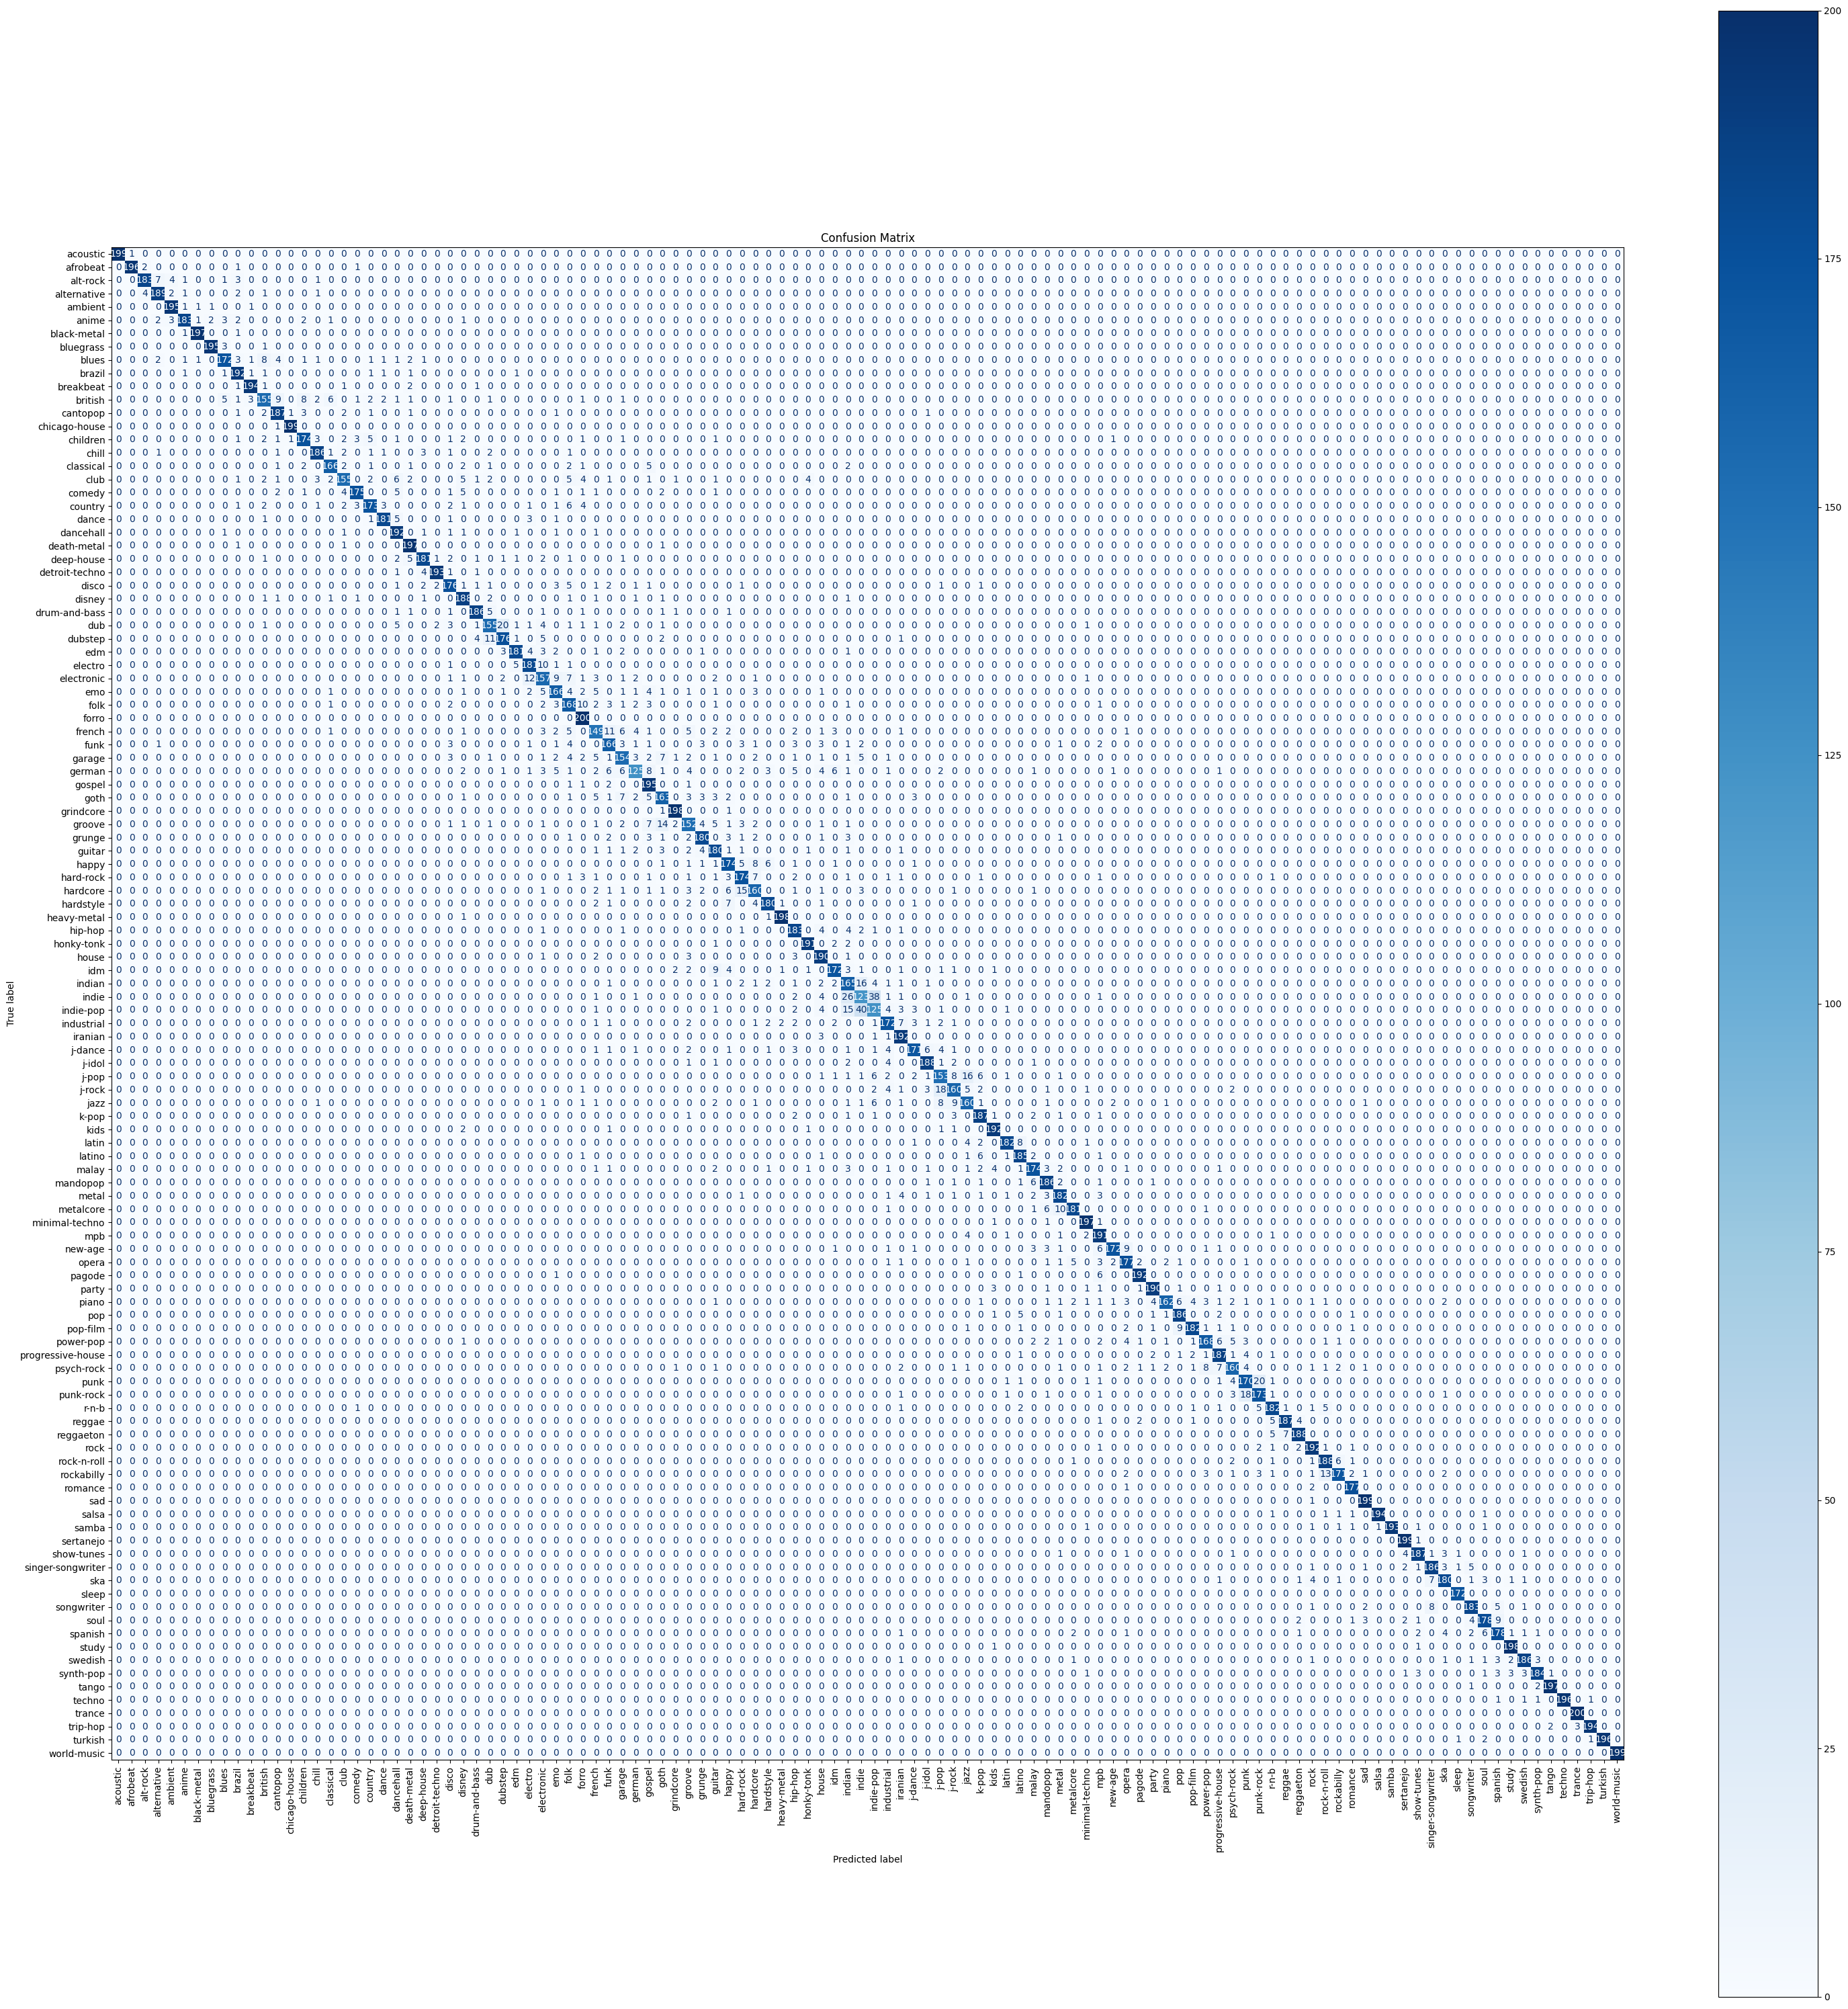

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_opt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(30, 30))
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [65]:
print(classification_report(y_test, y_pred_opt, target_names=le.classes_))

                   precision    recall  f1-score   support

         acoustic       1.00      0.99      1.00       200
         afrobeat       0.99      0.98      0.99       200
         alt-rock       0.97      0.92      0.94       200
      alternative       0.94      0.94      0.94       200
          ambient       0.96      0.98      0.97       199
            anime       0.97      0.92      0.94       200
      black-metal       0.98      0.99      0.99       199
        bluegrass       0.98      0.98      0.98       199
            blues       0.92      0.86      0.89       200
           brazil       0.91      0.96      0.93       200
        breakbeat       0.97      0.97      0.97       200
          british       0.87      0.78      0.82       200
         cantopop       0.90      0.94      0.92       200
    chicago-house       0.99      0.99      0.99       200
         children       0.91      0.87      0.89       200
            chill       0.93      0.93      0.93       

# Results and Conclusion

Our RandomForest is doing very well given the large number of classes. Support is roughly balanced (~200 examples per class), meaning differences aren’t due to balancing.

Here are our conlusions:

- The genres "Indie", "indian" and "indie-pop" are highly overlapping and ambiguous, this may cause the poor performance. We observe the same results for "punk" and "punk-rock".

- Language-based genres (french, german) may rely on lyrics or metadata not captured by pure audio features, this may cause the diminution of the results.

- "Electronic" is extremely broad, so it may mix up substyles (EDM, electro, deep-house, techno).

Finally, and by way of conclusion, we can question the quality of the dataset. If we take a closer look at the tracks labeled as 'techno', many of them do not appear to be relevant. In particular, upon listening to some of these tracks, it becomes clear that they are not related to the 'techno' genre at all.
Since it is not feasible to manually listen to all the tracks in order to accurately filter them, we can reasonably conclude that this dataset may not be well-suited for our task. As a result, despite achieving very good results on this dataset, the model may fail to generalize to new data.

In [66]:
df[df['track_genre'] == 'techno']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.093300,0.000927,0.1150,0.1660,100.966,4,techno
109001,0b6wdul3A5sQNpIOv03OxP,Duke Dumont,Ocean Drive,Ocean Drive,72,206320,False,0.686,0.718,8,-5.054,0,0.0431,0.006370,0.000703,0.1190,0.5570,115.026,4,techno
109002,0zoGVO4bQXG8U6ChKwNgeg,Taeko Onuki,MIGNONNE (Mastered by Bernie Grundman),4:00A.M.,70,336960,False,0.631,0.644,10,-10.810,0,0.0348,0.341000,0.000411,0.0877,0.8610,103.376,4,techno
109003,6uBhi9gBXWjanegOb2Phh0,Zedd;Alessia Cara,Stay,Stay,76,210090,False,0.690,0.622,5,-5.025,0,0.0622,0.253000,0.000000,0.1160,0.5440,102.040,4,techno
109004,5aUSEPNd3m5xliFK4pn5mU,Zedd;Kehlani,Good Thing (with Kehlani),Good Thing (with Kehlani),68,210901,True,0.693,0.564,1,-3.857,0,0.0378,0.399000,0.000000,0.0409,0.5740,185.913,3,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1910z5NqrGoJ8SuKWNu19D,Scooter,I Want You to Stream!,Bora Bora Bora - Live,25,230250,False,0.726,0.875,9,-5.957,0,0.1930,0.203000,0.001510,0.5680,0.5230,139.955,4,techno
109996,2MgcPgxFvAlJCVITsEghCI,Ruffneck;Yavahn;Sharam Jey;Kolombo,Everybody Be Somebody: All The Classics And...,"Everybody Be Somebody - Sharam Jey, Kolombo Remix",24,252524,False,0.875,0.511,6,-6.677,0,0.0474,0.204000,0.044500,0.1390,0.5870,122.169,4,techno
109997,3Rn21K5Te3TUM0AcFtisuX,Marshall Masters,Thunderdome Die Hard II (Digital Version),Return To Zero - The Mystery Land Anthem,25,120110,False,0.679,0.866,8,-9.691,1,0.0719,0.000038,0.755000,0.9560,0.0457,147.086,4,techno
109998,3P5xhGZ3c9tOmyvpiTAvVn,Paul Elstak,b2s Presents Paul Elstak,The Dj’s Pumping - Freestyle Edit,24,179175,False,0.602,0.933,10,-4.886,1,0.0471,0.001720,0.032500,0.3720,0.5190,150.047,4,techno
